In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
import numpy as np
from scipy.stats import linregress




In [2]:
happiness_path = os.path.join('/Users/anthonygarcia/Desktop/Project-Happy-Hour-1/HappinessAlcoholConsumption.csv')
income_path = os.path.join('/Users/anthonygarcia/Desktop/Project-Happy-Hour-1/countries_income_group.csv')

In [3]:
happiness_study_df = pd.read_csv(happiness_path)
income_study_df = pd.read_csv(income_path, index_col=[0])

In [4]:
income_study_df.rename(columns = {'Economy' : 'Country'}, inplace = True)

In [5]:
alcohol_study = pd.merge(happiness_study_df, income_study_df, on = "Country")

alcohol_study.head(10)

,Country,Region_x,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Code,Region_y,Income group
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278,DNK,Europe & Central Asia,High income
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280,CHE,Europe & Central Asia,High income
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78,ISL,Europe & Central Asia,High income
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129,NOR,Europe & Central Asia,High income
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97,FIN,Europe & Central Asia,High income
5,Canada,North America,north,7.404,922,42.349,240,122,100,CAN,North America,High income
6,Netherlands,Western Europe,north,7.339,928,45.638,251,88,190,NLD,Europe & Central Asia,High income
7,New Zealand,Australia and New Zealand,south,7.334,915,40.332,203,79,175,NZL,East Asia & Pacific,High income
8,Australia,Australia and New Zealand,south,7.313,938,49.897,261,72,212,AUS,East Asia & Pacific,High income
9,Sweden,Western Europe,north,7.291,932,51.845,152,60,186,SWE,Europe & Central Asia,High income


In [6]:
final_alcohol = alcohol_study.drop(columns=['Code', 'Region_y'])

pd.set_option("display.max_rows", None, "display.max_columns", None)
print(final_alcohol)

                    Country                         Region_x Hemisphere  \
0                   Denmark                   Western Europe      north   
1               Switzerland                   Western Europe      north   
2                   Iceland                   Western Europe      north   
3                    Norway                   Western Europe      north   
4                   Finland                   Western Europe      north   
5                    Canada                    North America      north   
6               Netherlands                   Western Europe      north   
7               New Zealand        Australia and New Zealand      south   
8                 Australia        Australia and New Zealand      south   
9                    Sweden                   Western Europe      north   
10                   Israel  Middle East and Northern Africa      north   
11                  Austria                   Western Europe      north   
12            United Stat

In [7]:

avg_beer = final_alcohol['Beer_PerCapita'].mean()
avg_spirit = final_alcohol['Spirit_PerCapita'].mean()
avg_wine = final_alcohol['Wine_PerCapita'].mean()


In [163]:
#Filter to find top5 happiest countries 
top5 = final_alcohol.loc[final_alcohol['HappinessScore'] > 7.41]
top5

,Country,Region_x,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Income group
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278,High income
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280,High income
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78,High income
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129,High income
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97,High income


In [161]:
#Filter to find bottom5 least happiest countries
bottom5 = final_alcohol.loc[final_alcohol['HappinessScore'] <= 3.7]
bottom5

,Country,Region_x,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Income group
107,Madagascar,Sub-Saharan Africa,south,3.695,517,402.0,26,15,4,Low income
108,Tanzania,Sub-Saharan Africa,south,3.666,533,878.0,36,6,1,Low income
109,Liberia,Sub-Saharan Africa,north,3.622,432,455.0,19,152,2,Low income
110,Benin,Sub-Saharan Africa,north,3.484,512,789.0,34,4,13,Low income
111,Togo,Sub-Saharan Africa,north,3.303,500,577.0,36,2,19,Low income


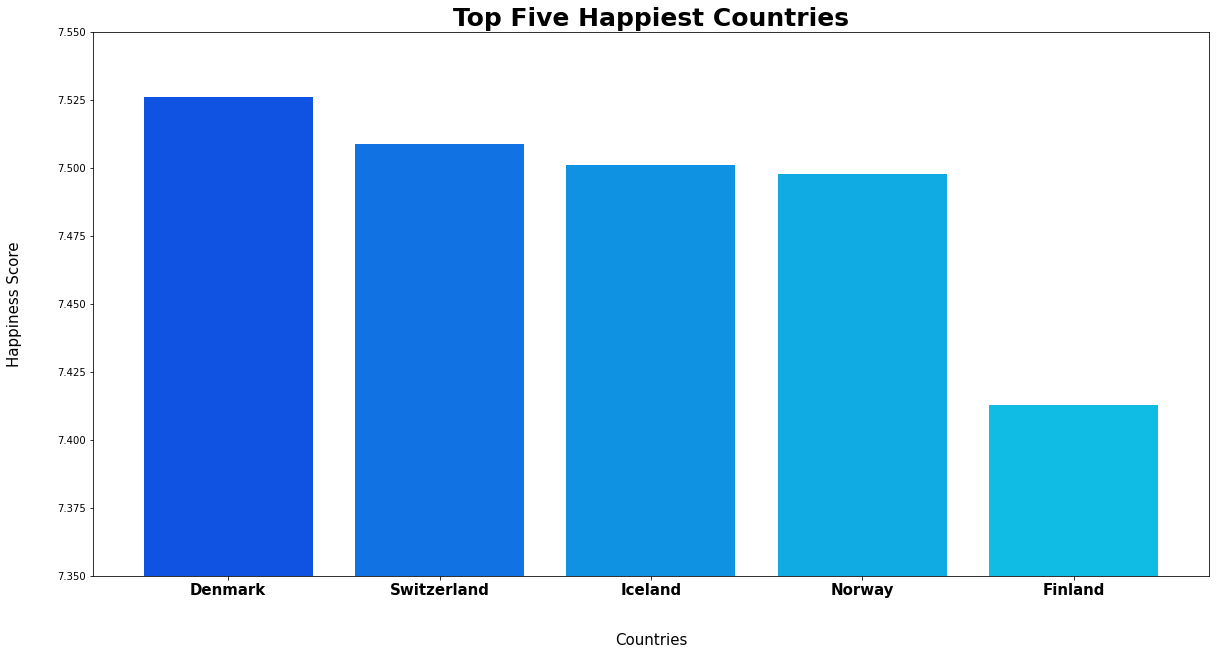

In [108]:
#variables for bar graph
x = top5['Country']
y = top5['HappinessScore']

color = ['#1053e3', '#1072e3', '#1092e3','#10abe3','#10bce3']

#plot the bar graph
plt.bar(x,y, color=color)

#add labels and styling to graph
plt.xticks(fontsize=15, fontweight='bold')
plt.xlabel('Countries', fontsize=15, labelpad=35)
plt.ylabel('Happiness Score', fontsize=15, labelpad=35)
plt.title('Top Five Happiest Countries', fontsize=25, loc='center', fontweight='bold')
plt.ylim(7.35,7.55)
fig = plt.gcf()
fig.set_size_inches(20,10)

plt.show()    

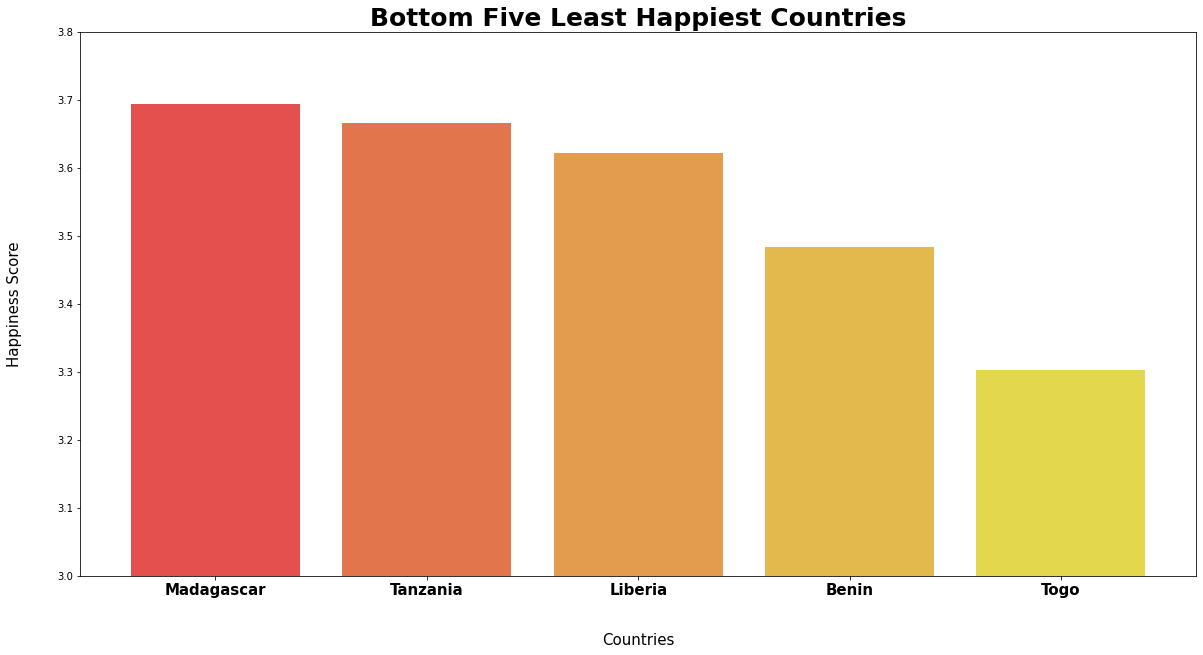

In [110]:
x = bottom5['Country']
y = bottom5['HappinessScore']
color = ['#e3504d', '#e3754d', '#e39b4d','#e3b94d','#e3d74d']
plt.bar(x,y)




plt.bar(x,y, color=color)
plt.xticks(fontsize=15, fontweight='bold')
plt.xlabel('Countries', fontsize=15, labelpad=35)
plt.ylabel('Happiness Score', fontsize=15, labelpad=35)
plt.title('Bottom Five Least Happiest Countries',fontsize=25, loc='center', fontweight='bold')
plt.ylim(3.0,3.8)
fig = plt.gcf()
fig.set_size_inches(20,10)

plt.savefig('bottom5.jpg')


plt.show()

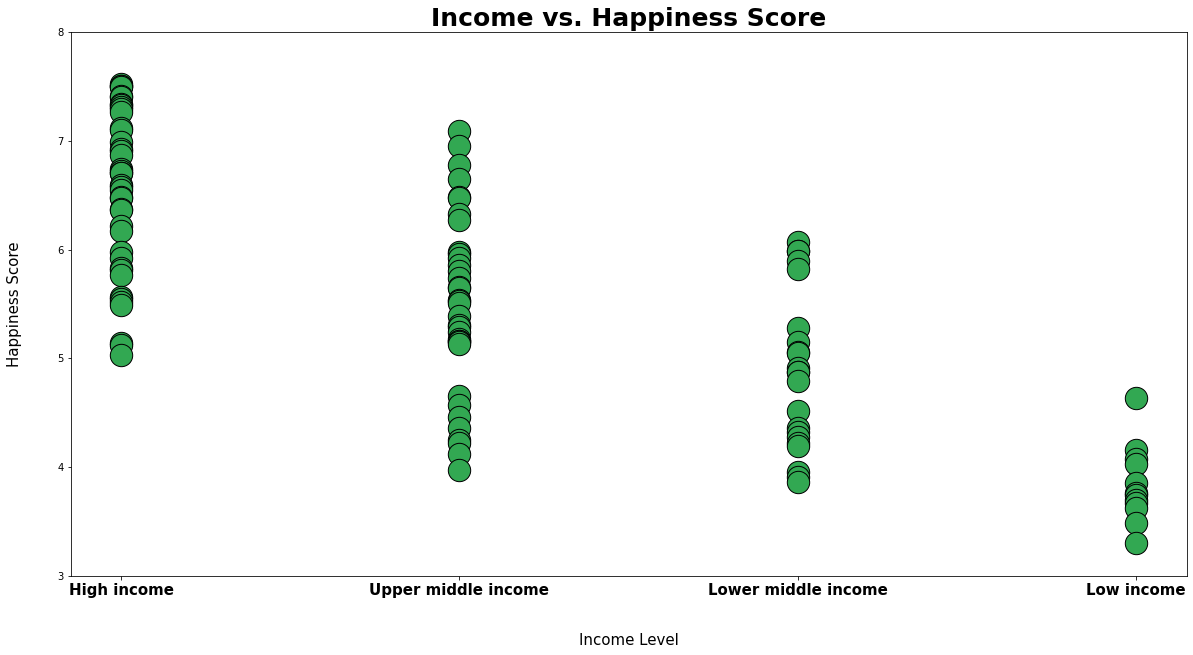

In [142]:
x = final_alcohol['Income group']
y= final_alcohol['HappinessScore']

plt.scatter(x,y,s=500, edgecolor='k', facecolors='#32a852')

plt.ylim(3,8)
plt.xticks(fontsize=15, fontweight='bold')
plt.xlabel('Income Level', fontsize=15, labelpad=35)
plt.ylabel('Happiness Score', fontsize=15, labelpad=35)
plt.title('Income vs. Happiness Score',fontsize=25, loc='center', fontweight='bold')


fig = plt.gcf()
fig.set_size_inches(20,10)



plt.show()


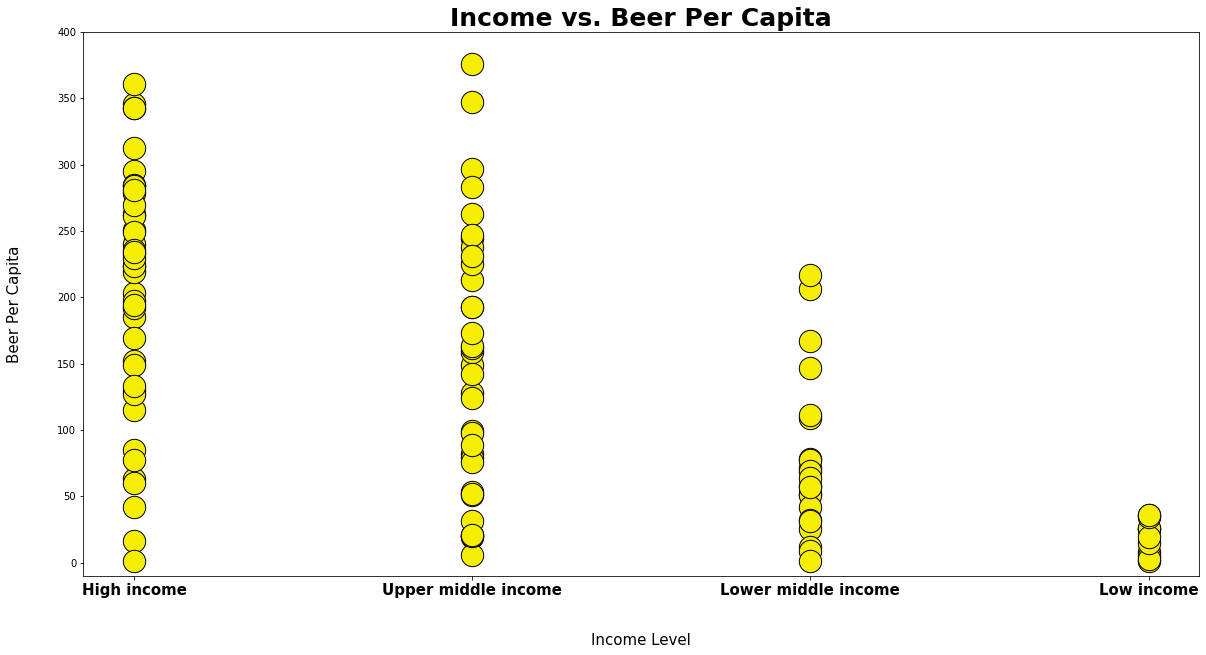

In [158]:
x = final_alcohol['Income group']
y = final_alcohol['Beer_PerCapita']

plt.scatter(x,y,edgecolor='k', facecolors='#f5ee02', s=500)
plt.xticks(fontsize=15, fontweight='bold')
plt.xlabel('Income Level', fontsize=15, labelpad=35)
plt.ylabel('Beer Per Capita', fontsize=15, labelpad=35)
plt.title('Income vs. Beer Per Capita',fontsize=25, loc='center', fontweight='bold')

plt.ylim(-10,400)


fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

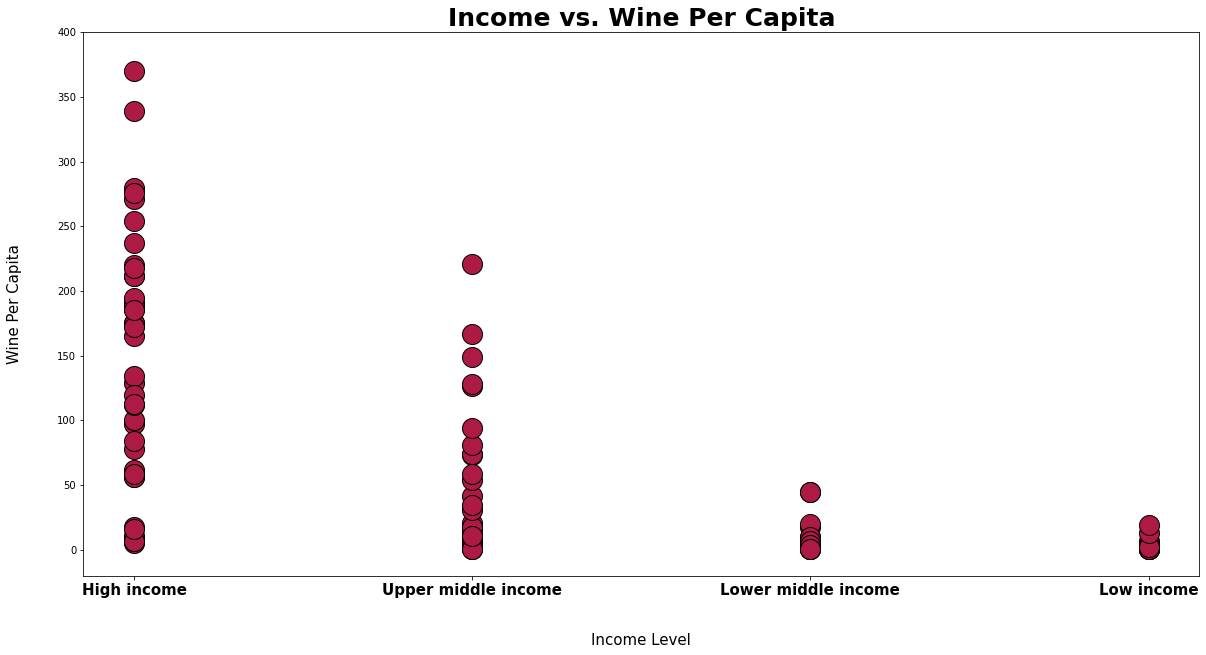

In [136]:
x = final_alcohol['Income group']
y= final_alcohol['Wine_PerCapita']

plt.scatter(x,y, edgecolor='k', s=400, facecolors='#ad1a44')
plt.xticks(fontsize=15, fontweight='bold')
plt.xlabel('Income Level', fontsize=15, labelpad=35)
plt.ylabel('Wine Per Capita', fontsize=15, labelpad=35)
plt.title('Income vs. Wine Per Capita',fontsize=25, loc='center', fontweight='bold')

plt.ylim(-20,400)


fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

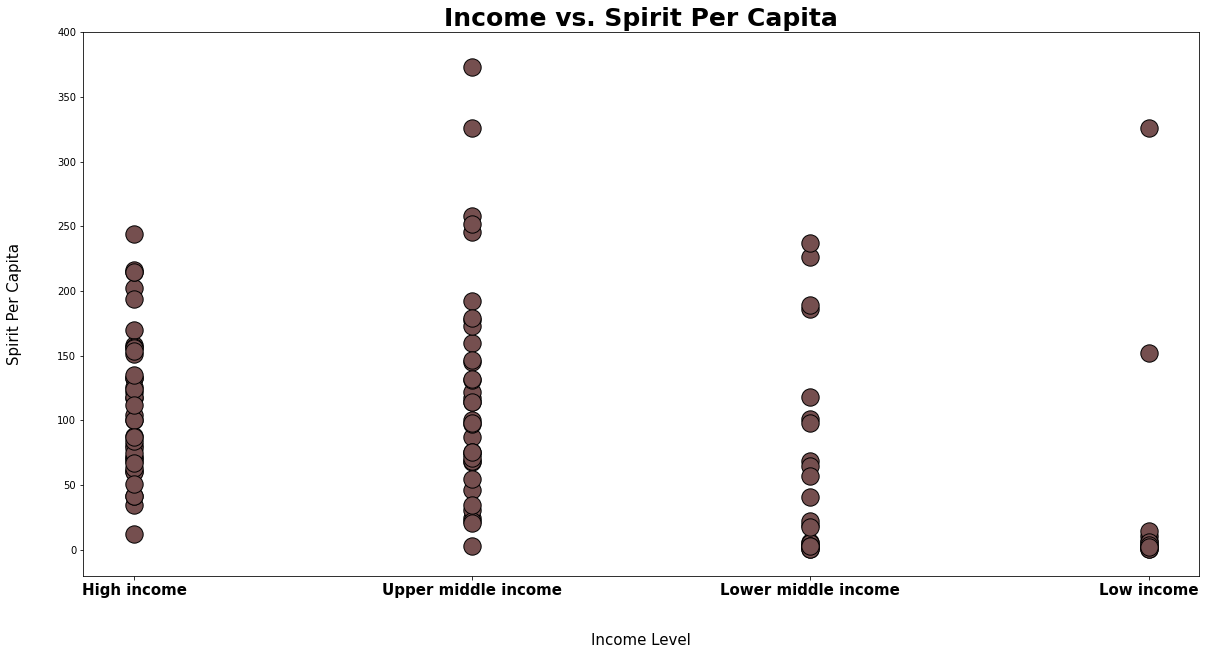

In [137]:
x = final_alcohol['Income group']
y= final_alcohol['Spirit_PerCapita']

plt.scatter(x,y, edgecolor='k', facecolors='#754f4f', s=300)
plt.xticks(fontsize=15, fontweight='bold')
plt.xlabel('Income Level', fontsize=15, labelpad=35)
plt.ylabel('Spirit Per Capita', fontsize=15, labelpad=35)
plt.title('Income vs. Spirit Per Capita',fontsize=25, loc='center', fontweight='bold')

plt.ylim(-20,400)


fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()